<a href="https://colab.research.google.com/github/2303a52163/Generative-AI-2025/blob/main/2303A52163_WEEK_6_2_ASSIGNMENT_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

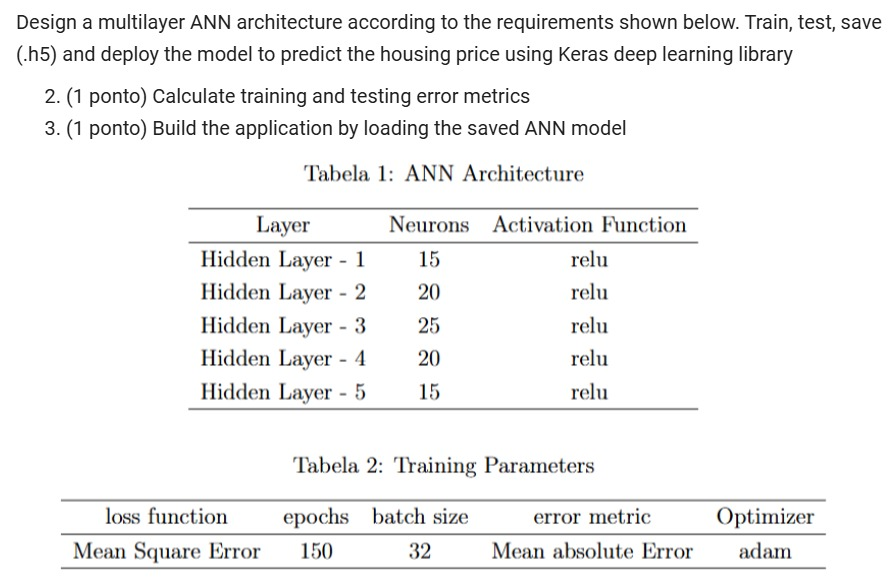

In [ ]:

import numpy as np
def relu(x):
    return np.maximum(0, x)
def relu_deriv(x):
    return (x > 0).astype(float)

def init_weights(layers):
    np.random.seed(1)
    w = [np.random.randn(layers[i], layers[i+1]) * 0.1 for i in range(len(layers)-1)]
    b = [np.random.randn(1, layers[i+1]) * 0.1 for i in range(len(layers)-1)]
    return w, b

def forward(X, w, b):
    a = [X]
    for i in range(len(w)-1):
        a.append(relu(np.dot(a[-1], w[i]) + b[i]))
    a.append(np.dot(a[-1], w[-1]) + b[-1])
    return a

def backprop(X, y, w, b, lr):
    a = forward(X, w, b)
    err = y - a[-1]
    d = [err]
    for i in range(len(w)-1, 0, -1):
        d.append(np.dot(d[-1], w[i].T) * relu_deriv(a[i]))
    d.reverse()

    for i in range(len(w)):
        w[i] += np.dot(a[i].T, d[i]) * lr
        b[i] += np.sum(d[i], axis=0, keepdims=True) * lr

def train(X, y, layers, lr=0.001, epochs=150):
    w, b = init_weights(layers)
    for _ in range(epochs):
        backprop(X, y, w, b, lr)
    return w, b

def predict(X, w, b):
    return forward(X, w, b)[-1]

def mse(y, y_pred):
    return np.mean((y - y_pred) ** 2)

X_train = np.random.rand(500, 10)
y_train = np.random.rand(500, 1)

X_test = np.random.rand(100, 10)
y_test = np.random.rand(100, 1)

layers = [10, 15, 20, 25, 20, 15, 1]
w, b = train(X_train, y_train, layers, lr=0.001, epochs=150)

train_mse = mse(y_train, predict(X_train, w, b))
test_mse = mse(y_test, predict(X_test, w, b))

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

new_data = np.random.rand(1, 10)
predicted_price = predict(new_data, w, b)
print("Predicted Price:", predicted_price[0][0])

Train MSE: 0.07668246301221694
Test MSE: 0.0739089661921231
Predicted Price: 0.5104306311886129
